<a href="https://colab.research.google.com/github/Mbali-ML/Assignment/blob/master/HomeWork3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [0]:
Hdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kc_house_data.csv')

In [0]:
 Hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [0]:
housedata


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [0]:
Hdata.shape


(21613, 21)

In [0]:
Hdata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No handles with labels found to put in legend.


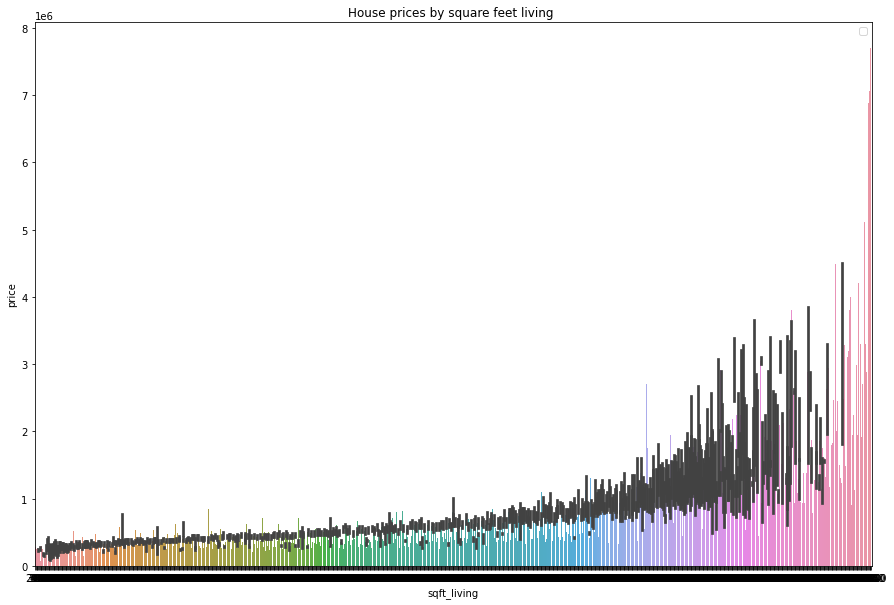

In [0]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("House prices by square feet living ")
plt.xlabel('sqft_living')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x= 'sqft_living', y='price', data=housedata)

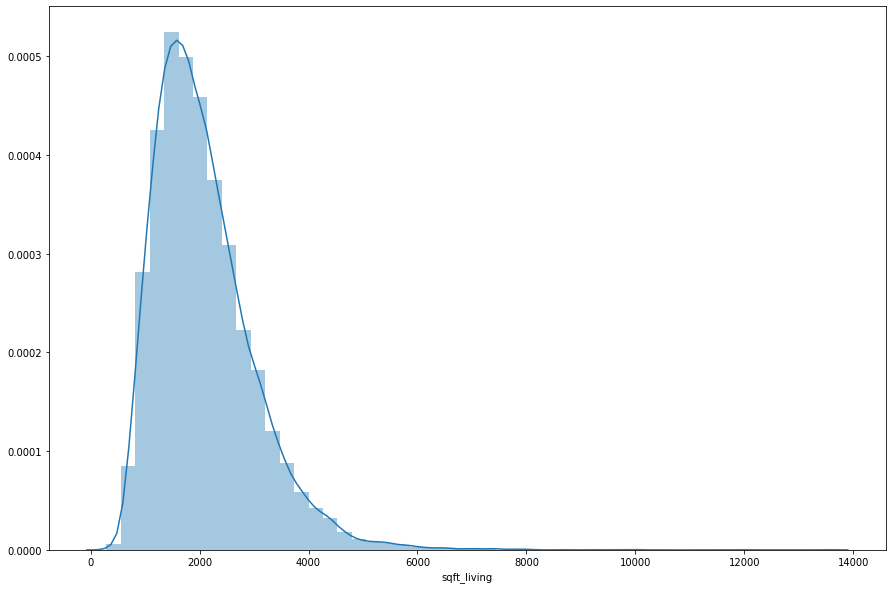

In [0]:
fig,axes= plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.distplot(Hdata['sqft_living'],hist= True, kde=True,rug=False,label='sqft_living',norm_hist=True)

In [0]:
print('Mean',round(Hdata['sqft_living'].mean(),2))
print('Median',Hdata['sqft_living'].median())
print('Mode',Hdata['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


In [0]:
prices = housedata['price']

# Minimum price of the data
min_price = np.amin(prices)

# Maximum price of the data
max_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Price statistics for housing dataset:\n")
print("Minimum price: ${}".format(min_price)) 
print("Maximum price: ${}".format(max_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Price statistics for housing dataset:

Minimum price: $75000.0
Maximum price: $7700000.0
Mean price: $540088.1417665294
Median price $450000.0
Standard deviation of prices: $367118.7031813722


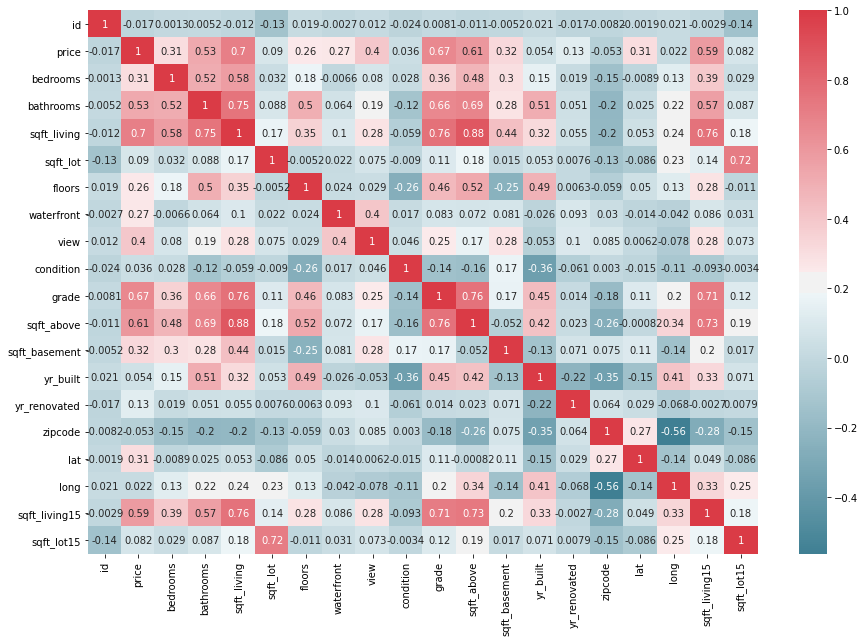

In [0]:

def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(Hdata.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(Hdata)

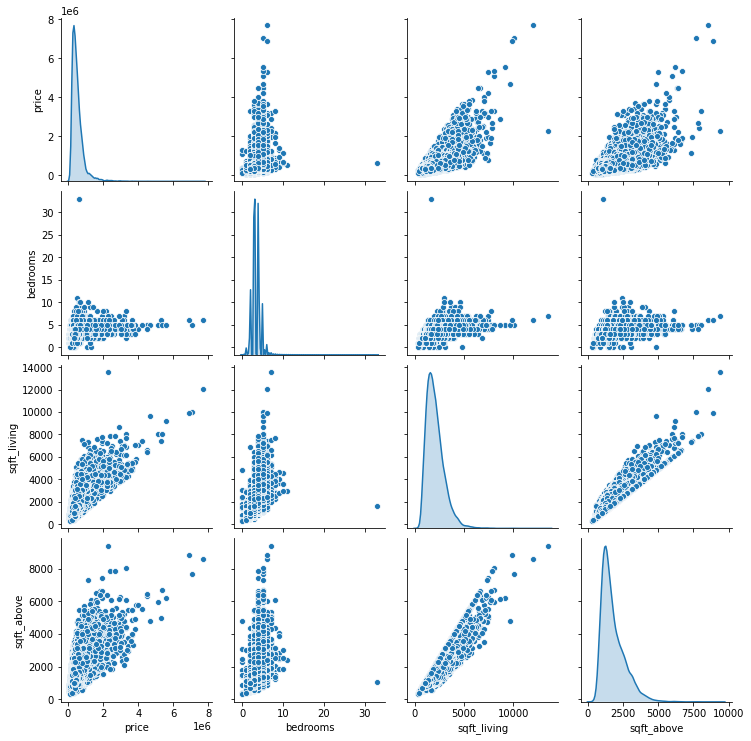

In [0]:
sns.pairplot(Hdata[["price", "bedrooms", "sqft_living", "sqft_above"]], diag_kind="kde")

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [0]:
train_data,test_data=train_test_split(Hdata,train_size=0.5,random_state=3)
reg=linear_model.LinearRegression()

In [0]:

x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 262265.74
R squared training 0.495
R sqaured testing 0.49
intercept [-42978.77202418]
coefficient [[280.15922852]]


In [0]:
sqftsize=1000
prarray = np.array(sqftsize).reshape(1,-1)
reg.predict(prarray)

array([[237180.45649236]])

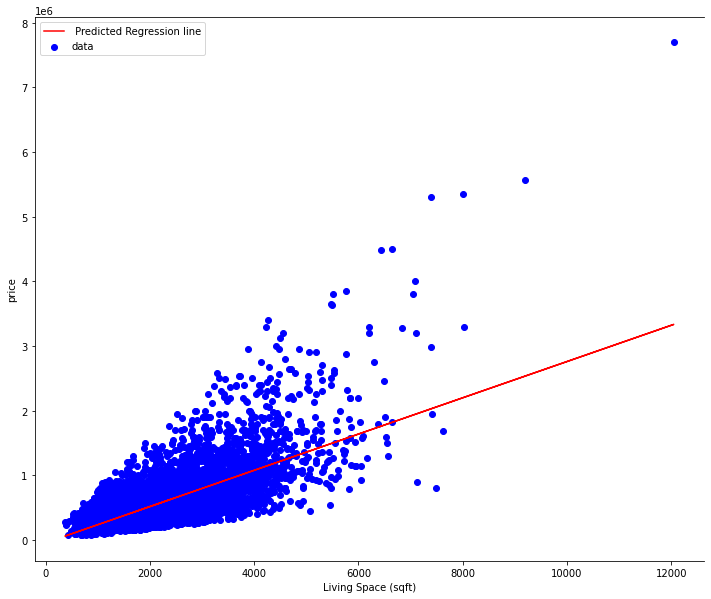

In [0]:

_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'blue', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [0]:
X_new= housedata.drop(['price','id','date'], axis=1)
Y_new= housedata['price']

#from sklearn.cross_validation import train_test_split

X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.3, random_state=0)

Linear Regression Mean squared error 207035.94
Linear Regression r2 score: 0.69
Accuracy score 0.7044808067489785


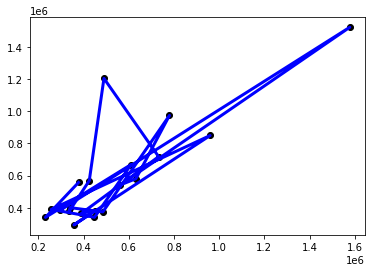

In [0]:
from sklearn.linear_model import LinearRegression

reg2 = linear_model.LinearRegression()
reg2.fit(X_train_new, Y_train_new)
Y_pred2=reg2.predict(X_test_new)
mean_squared_error=metrics.mean_squared_error(Y_test_new,Y_pred2)
#print('Linear Regression Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
print('Linear Regression Mean squared error', round(np.sqrt(mean_squared_error),2))
print('Linear Regression r2 score: %.2f' % r2_score(Y_test_new, Y_pred2))
print('Accuracy score',reg2.score(X_train_new, Y_train_new))



plt.scatter(Y_test_new[:20], Y_pred2[:20], color='black')
plt.plot(Y_test_new[:20], Y_pred2[:20], color='blue', linewidth=3)

plt.show()

RandomForestRegressor Mean squared error 132289.31
RandomForestRegressor r2 score: 0.87
RandomForestRegressor Accuracy score 0.9361981184248215


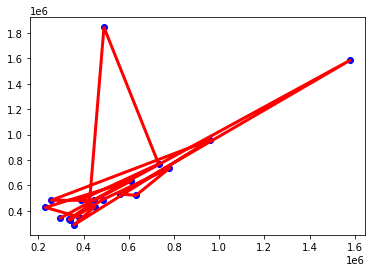

In [0]:
from sklearn import ensemble

reg3 = ensemble.RandomForestRegressor(max_depth=10, random_state=0, n_estimators=500)
reg3.fit(X_train_new, Y_train_new)
Y_pred3=reg3.predict(X_test_new)
mean_squared_error=metrics.mean_squared_error(Y_test_new,Y_pred3)
#print("RandomForestRegressor Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print('RandomForestRegressor Mean squared error', round(np.sqrt(mean_squared_error),2))
print('RandomForestRegressor r2 score: %.2f' % r2_score(Y_test_new, Y_pred3))
print('RandomForestRegressor Accuracy score',reg3.score(X_train_new, Y_train_new))


plt.scatter(Y_test_new[:20], Y_pred3[:20], color='blue')
plt.plot(Y_test_new[:20], Y_pred3[:20], color='red', linewidth=3)

plt.show()

GradientBoostingRegressor Mean squared error 123906.76
GradientBoostingRegressor r2 score: 0.89
GradientBoostingRegressor Accuracy score 0.9990804818111731


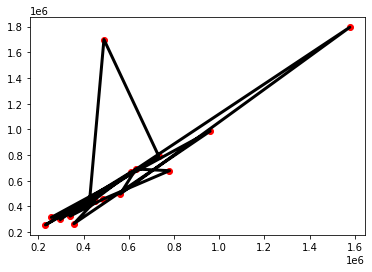

In [0]:
from sklearn import ensemble
reg4 = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 10, min_samples_split = 2, learning_rate = 0.1, loss = 'ls')

reg4.fit(X_train_new, Y_train_new)
Y_pred4=reg4.predict(X_test_new)
mean_squared_error=metrics.mean_squared_error(Y_test_new,Y_pred4)

print('GradientBoostingRegressor Mean squared error', round(np.sqrt(mean_squared_error),2))
print('GradientBoostingRegressor r2 score: %.2f' % r2_score(Y_test_new, Y_pred4))
print('GradientBoostingRegressor Accuracy score',reg4.score(X_train_new, Y_train_new))

plt.scatter(Y_test_new[:20], Y_pred4[:20], color='red')
plt.plot(Y_test_new[:20], Y_pred4[:20], color='black', linewidth=3)

plt.show()